In [58]:
import csv
import pandas as pd

name = '4'

def parse_text_to_csv(file_path):
    # Open the text file
    with open(file_path, 'r') as file:
        lines = file.readlines()

    # Extract the data from the lines
    data = {}
    column_labels = []
    for line in lines:
        line = line.strip()
        if line:
            parts = line.split(':')
            if len(parts) == 2:
                label = parts[0].strip()
                value = parts[1].strip()
                if label not in column_labels:
                    column_labels.append(label)
                if label not in data:
                    data[label] = []
                data[label].append(value)

    # Write the data into a CSV file
    csv_file_path = file_path.replace('.txt', '.csv')
    with open(csv_file_path, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(column_labels)
        max_rows = max(len(data[label]) for label in column_labels)
        for i in range(max_rows):
            row = [data[label][i] if i < len(data[label]) else '' for label in column_labels]
            writer.writerow(row)

    print(f"CSV file '{csv_file_path}' created successfully.")

# Usage example
file_path = f"./txt/{name}.txt"
parse_text_to_csv(file_path)

CSV file './txt/4.csv' created successfully.


In [66]:
# Read the CSV file
# df1 = pd.read_csv(f"./txt/1.csv")
df2 = pd.read_csv(f"./txt/2.csv")
df3 = pd.read_csv(f"./txt/3.csv")
df4 = pd.read_csv(f"./txt/4.csv")

# Print the DataFrame
# df1, df2

<Axes: xlabel='des'>

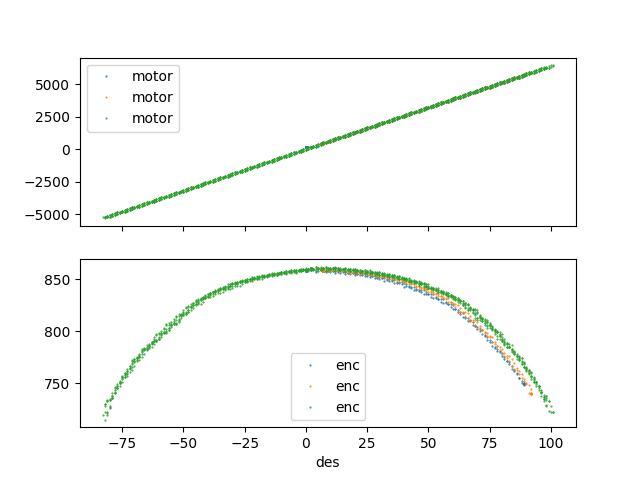

In [67]:
import matplotlib.pyplot as plt
%matplotlib widget

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
# df1.plot('des', 'motor', style='.', markersize=1, ax=ax1)
df2.plot('des', 'motor', style='.', markersize=1, ax=ax1)
df3.plot('des', 'motor', style='.', markersize=1, ax=ax1)
df4.plot('des', 'motor', style='.', markersize=1, ax=ax1)
# df1.plot('des', 'enc', style='.', markersize=1, ax=ax2)
df2.plot('des', 'enc', style='.', markersize=1, ax=ax2)
df3.plot('des', 'enc', style='.', markersize=1, ax=ax2)
df4.plot('des', 'enc', style='.', markersize=1, ax=ax2)


Line equation:             4             3            2
-5.483e-14 x + 1.211e-10 x - 2.22e-06 x + 0.002702 x + 859


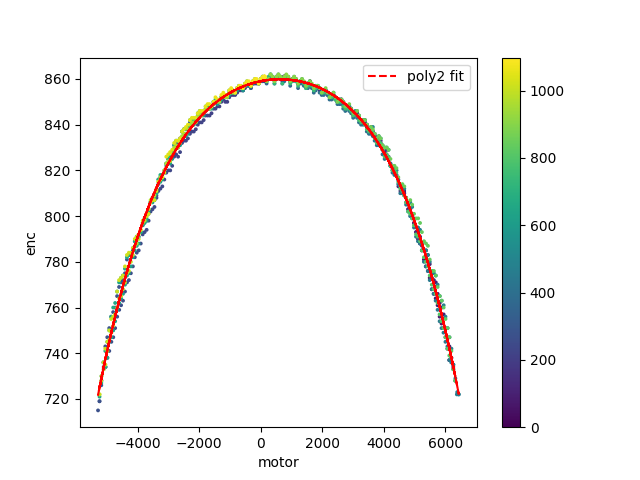

In [71]:
plt.figure()
# df.plot('motor', 'enc', style='-', markersize=3, c=df['motor'])
plt.scatter(df4['motor'], df4['enc'], s=3, c=df4.index)

plt.colorbar()


plt.xlabel('motor')
plt.ylabel('enc')
# plt.show()

import numpy as np

# Fit a 2nd degree polynomial for enc vs motor
z = np.polyfit(df4['motor'], df4['enc'], 4)
p = np.poly1d(z)

# Plot the polynomial
plt.plot(df4['motor'], p(df4['motor']), "r--", label='poly2 fit')
plt.xlabel('motor')
plt.ylabel('enc')

plt.legend()
print(f"Line equation: {p}")


plt.show()


In [72]:
df4

,des,motor,enc
0,12,770,861
1,12,770,861
2,12,770,861
3,12,770,861
4,12,770,861
...,...,...,...
1094,2,125,861
1095,2,125,861
1096,2,125,861
1097,2,125,861


In [91]:
enc_zero = df4['enc'][0]
enc_start = np.deg2rad(-52.5)
motor_zero = df4['enc'][0]

df4['rad_out'] = -((df4['enc'] - enc_zero) *2*np.pi / 1024.0) + enc_start
df4['deg_out'] = np.rad2deg(df4['rad_out'])

df4['rad_in'] = (df4['motor'] - motor_zero) *2*np.pi / 256.0

r_motor_pivot = 65.683 #mm
df4["contract"] = np.sqrt(50**2 + r_motor_pivot**2 - 2*50*r_motor_pivot*np.cos(df4['rad_out']))

# df4[10:20]

,des,motor,enc,deg,rot_out,rot_in,rad_out,rad_in,contract,deg_out
10,18,1088,860,-0.351562,-0.000977,0.886719,-0.910162,5.571418,52.762014,-52.148438
11,19,1149,860,-0.351562,-0.000977,1.125000,-0.910162,7.068583,52.762014,-52.148438
12,20,1217,858,-1.054688,-0.002930,1.390625,-0.897890,8.737555,52.158308,-51.445312
13,21,1282,859,-0.703125,-0.001953,1.644531,-0.904026,10.332895,52.460300,-51.796875
14,22,1344,859,-0.703125,-0.001953,1.886719,-0.904026,11.854604,52.460300,-51.796875
15,23,1405,858,-1.054688,-0.002930,2.125000,-0.897890,13.351769,52.158308,-51.445312
16,24,1473,857,-1.406250,-0.003906,2.390625,-0.891754,15.020740,51.856043,-51.093750
17,25,1538,858,-1.054688,-0.002930,2.644531,-0.897890,16.616080,52.158308,-51.445312
18,26,1600,859,-0.703125,-0.001953,2.886719,-0.904026,18.137789,52.460300,-51.796875
19,27,1661,857,-1.406250,-0.003906,3.125000,-0.891754,19.634954,51.856043,-51.093750


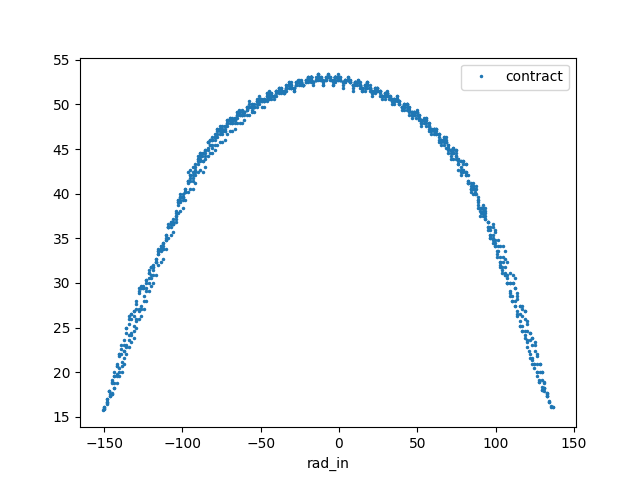

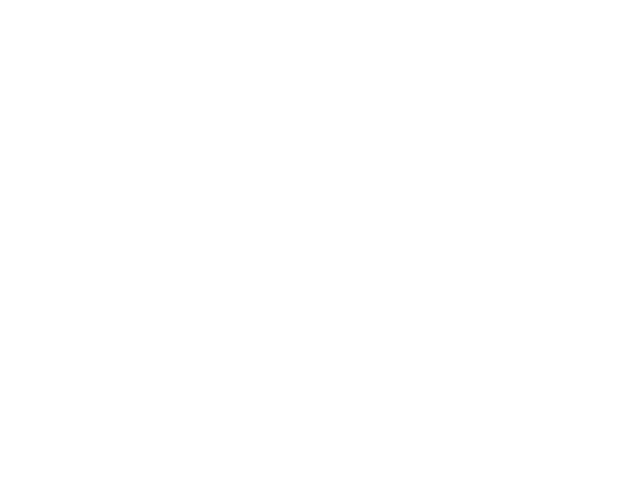

In [94]:
plt.figure()
# plt.scatter(df4['motor'], df4['deg'], s=3, c=df4.index)
df4.plot('rad_in', 'contract', style='.', markersize=3)


plt.show()